<a href="https://colab.research.google.com/github/alfonsoayalapaloma/ml-2024/blob/main/ml_01_classifiers_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> Classifiers

# Solución de un problema de clasificación en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar variables independientes(X) y dependiente(y)]
2.   Partir el dataset en train y test
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clasificación de la especie de flor IRIS

1. Análisis del problema


Se tiene un dataset con clases (especie) y valores de ancho y largo de los sepalos y los petalos de flores. Se requiere crear un modelo de ML que pueda clasificar con un accuracy alto una flor dadas las medidas de sus sepalos y petalos.
Este es un problema de clasificacion y de aprendizaje supervisado, pues se tienen ejemplos marcados con labels (especie).

Se puede utilizar un clasificador como RandomForest. Se usará la accuracy para calificar el modelo.

2. Extraccion del dataset. Limpieza

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import seaborn as sns

iris = sns.load_dataset('iris')
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor
90,5.5,2.6,4.4,1.2,versicolor


3. EDA. Análisis del dataset

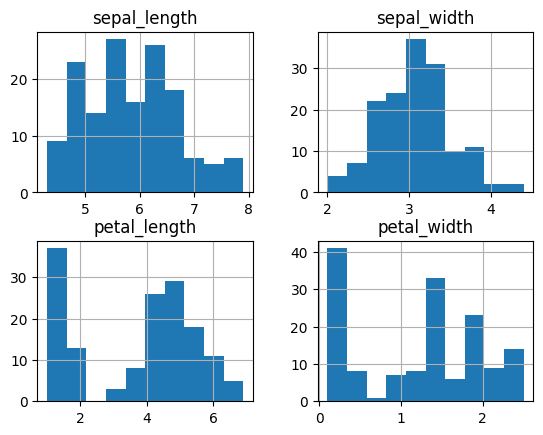

In [5]:
iris.hist();

Text(0, 0.5, 'Value')

<Figure size 1500x1800 with 0 Axes>

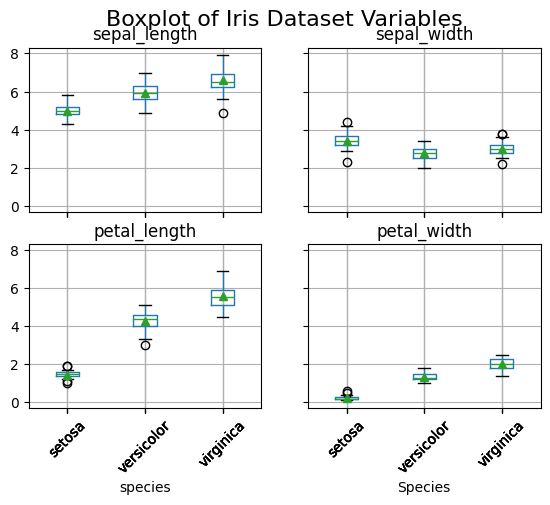

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 18))
iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
             by='species',
             layout=(2, 2),
             rot=45,
             showmeans=True)

# Set title and labels
plt.suptitle('Boxplot of Iris Dataset Variables', fontsize=16)
plt.xlabel('Species')
plt.ylabel('Value')

4. Feature engineering [ determinar variables independientes(X) y dependiente(y)]

In [7]:
numeric_cols=["sepal_length","sepal_width","petal_length","petal_width"]
target_col="species"

target_names = iris[target_col].unique()
X = iris[ numeric_cols ]
y = iris[ target_col ]

5. Partir el dataset en train y test

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (120, 4)
X_test (30, 4)
y_train (120,)
y_test (30,)


6. Crear y Entrenar (Ajustar) el modelo.

In [9]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

7. Hacer predicciones

In [10]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object


8. Calificar el modelo

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



9. Visualizar el resultado

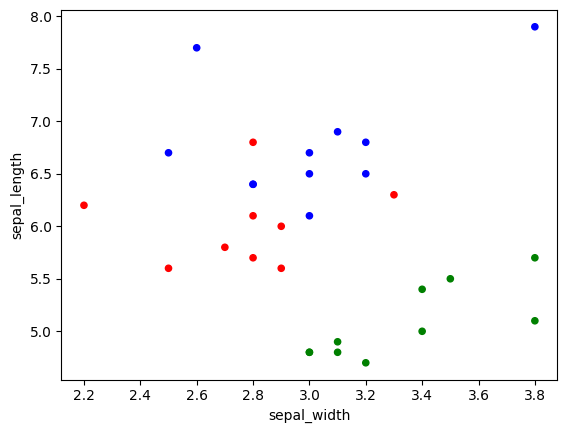

In [12]:
combined_df =X_test.copy()
combined_df['y_pred'] = y_pred
combined_df['y_test'] = y_test

colors = {"versicolor":"red","setosa":"green","virginica":"blue"}
combined_df['colors'] = combined_df['y_pred'].map(colors)
combined_df.plot.scatter(x='sepal_width', y='sepal_length', color=combined_df['colors']);

10. Elaborar conclusiones

El modelo tiene una alta accuracy por lo que se acepta como clasificador del dataset. Sin embargo se debe comprobar con un dataset con mayor numero de filas.

# EJERCICIO
Realice los mismos pasos para el siguiente problema: Clasificar si se hará o no una compra teniendo en cuenta el dataset que contiene los campos edad, salarioestimado y comprar_realizada.

El dataset se encuentra en:



```
url="https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/main/Social_Network_Ads.csv"

```





# EJERCICIO

Crear un modelo para predecir si el cancer de mama es benigno o maligno dado el dataset scikit-learn breast_cancer



In [13]:
from sklearn import datasets
#Load dataset
cancer = datasets.load_breast_cancer()
X=cancer.data
y=cancer.target
# print the cancer data features (top 5 records)
print('features:')
print(X[0:5])
print('target:')
# print the cancer labels (0:malignant, 1:benign)
print(y[0:5])

features:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839